In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import find_boundaries
from skimage.morphology import skeletonize
from skimage.draw import ellipse
from skimage.io import imsave

In [2]:
img_size = 200
center_y, center_x = (img_size/2, img_size/2)
container = np.zeros((img_size,img_size))

In [3]:
min_rad = 20
maj_rad = 50

In [4]:
layer0_coords = ellipse(center_y, center_x, min_rad, maj_rad)


In [5]:
container[layer0_coords] = 1

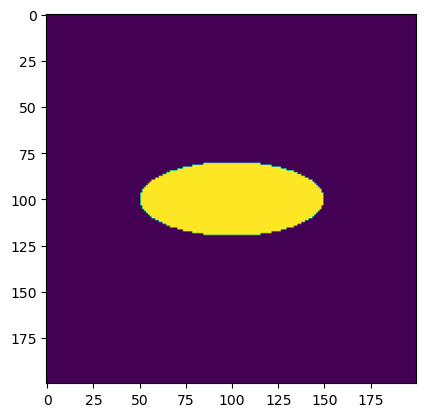

In [6]:
plt.imshow(container)
plt.show()

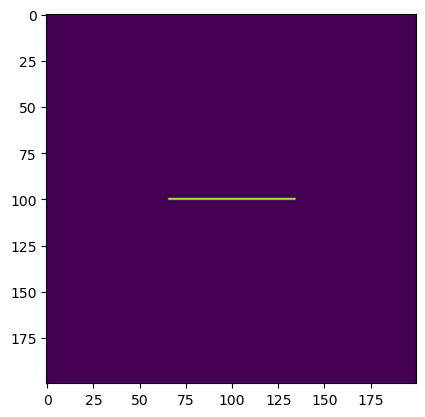

In [7]:
layer0_skel = skeletonize(container)
plt.imshow(layer0_skel)
plt.show()

In [8]:
layer0_boundaries = np.asarray(np.where(find_boundaries(container))).T

In [9]:
layer1_idx = np.random.randint(0, high=layer0_boundaries.shape[0]/2)

In [10]:
a,b = layer0_boundaries[layer1_idx]
a,b

(80, 105)

In [11]:
c,d = (center_y + (center_y-a), center_x + (center_x-b))
c,d

(120.0, 95.0)

In [12]:
layer1_asymm_idx = np.random.randint(0, high=layer0_boundaries.shape[0]/2)
e,f = layer0_boundaries[layer1_asymm_idx]
e,f

(84, 68)

In [13]:
g,h = (center_y + (center_y-e), center_x + (center_x-f))
g,h

(116.0, 132.0)

In [14]:
layer1_rad = min_rad/2

In [15]:
nub_1_1 = ellipse(a, b, layer1_rad, layer1_rad)
nub_1_2 = ellipse(c, d, layer1_rad, layer1_rad)
nub_1_3 = ellipse(e, f, layer1_rad, layer1_rad)
nub_1_4 = ellipse(g, h, layer1_rad, layer1_rad)

In [39]:
np.save('layer1_nub_coords.npy', (nub_1_1, nub_1_2, nub_1_3, nub_1_4))

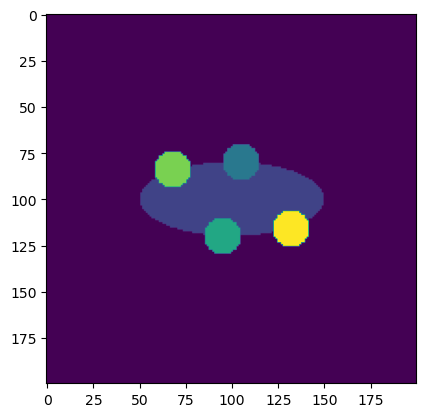

In [16]:
container[nub_1_1] = 2
container[nub_1_2] = 3
container[nub_1_3] = 4
container[nub_1_4] = 5
plt.imshow(container)
plt.show()

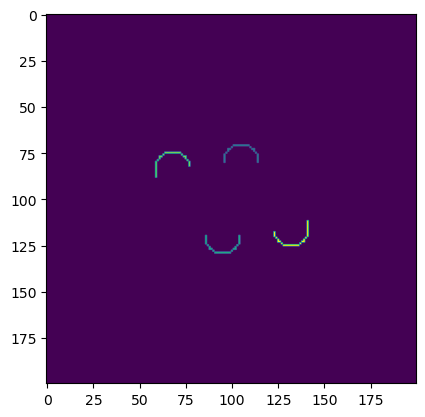

In [17]:
layer1_bool = container.astype(bool)
layer1_bnds = find_boundaries(layer1_bool)
layer1_bnds = layer1_bnds * container
layer1_bnds[layer1_bnds == 1] = 0
plt.imshow(layer1_bnds)
plt.show()

In [38]:
np.save('layer1_bnds.npy',layer1_bnds)

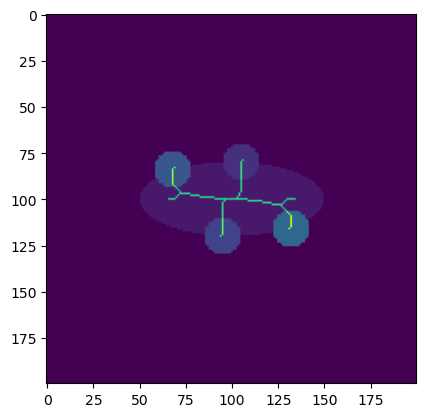

In [19]:
layer1_skel = skeletonize(container.astype(bool))
plt.imshow(container + layer1_skel.astype(int)*10)
plt.show()

In [20]:
nub_1_1_bnds = np.asarray(np.where(layer1_bnds==2)).T
nub_1_2_bnds = np.asarray(np.where(layer1_bnds==3)).T
nub_1_3_bnds = np.asarray(np.where(layer1_bnds==4)).T
nub_1_4_bnds = np.asarray(np.where(layer1_bnds==5)).T

layer2_1_idx = np.random.randint(0, high=nub_1_1_bnds.shape[0]/2)
layer2_2_idx = np.random.randint(0, high=nub_1_2_bnds.shape[0]/2)
layer2_3_idx = np.random.randint(0, high=nub_1_3_bnds.shape[0]/2)
layer2_4_idx = np.random.randint(0, high=nub_1_4_bnds.shape[0]/2)
layer2_1_idx, layer2_2_idx, layer2_3_idx, layer2_4_idx

(9, 7, 13, 9)

In [21]:
a211,b211= nub_1_1_bnds[layer2_1_idx]
a212,b212= (center_y + (center_y-a211), center_x + (center_x-b211))

c221,d221= nub_1_2_bnds[layer2_2_idx]
c222,d222= (center_y + (center_y-c221), center_x + (center_x-d221))

e231,f231= nub_1_3_bnds[layer2_3_idx]
e232,f232= (center_y + (center_y-e231), center_x + (center_x-f231))

g241,h241= nub_1_4_bnds[layer2_4_idx]
g242,h242= (center_y + (center_y-g241), center_x + (center_x-h241))

In [22]:
layer2_rad = layer1_rad/2

In [23]:
nub_2_1_1 = ellipse(a211, b211, layer2_rad, layer2_rad)
nub_2_1_2 = ellipse(a212, b212, layer2_rad, layer2_rad)

nub_2_2_1 = ellipse(c221, d221, layer2_rad, layer2_rad)
nub_2_2_2 = ellipse(c222, d222, layer2_rad, layer2_rad)

nub_2_3_1 = ellipse(e231, f231, layer2_rad, layer2_rad)
nub_2_3_2 = ellipse(e232, f232, layer2_rad, layer2_rad)

nub_2_4_1 = ellipse(g241, h241, layer2_rad, layer2_rad)
nub_2_4_2 = ellipse(g242, h242, layer2_rad, layer2_rad)

In [37]:
np.save('layer2_nub_coords.npy', (nub_2_1_1, nub_2_1_2, 
                                  nub_2_2_1, nub_2_2_2, 
                                  nub_2_3_1, nub_2_3_2, 
                                  nub_2_4_1, nub_2_4_2))

In [25]:
container[nub_2_1_1] = 2
container[nub_2_1_2] = 2

container[nub_2_2_1] = 3
container[nub_2_2_2] = 3

container[nub_2_3_1] = 4
container[nub_2_3_2] = 4

container[nub_2_4_1] = 5
container[nub_2_4_2] = 5

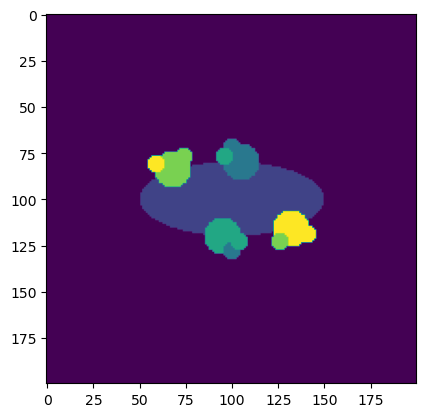

In [26]:
plt.imshow(container)
plt.show()

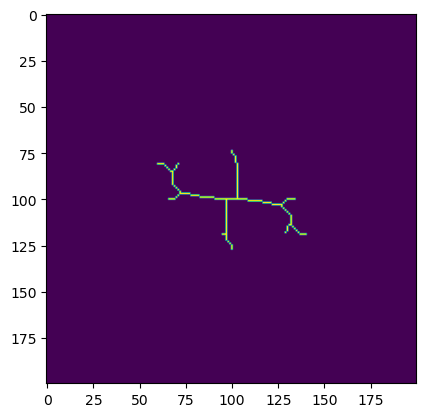

In [27]:
layer2_skel = skeletonize(container.astype(bool))
plt.imshow(layer2_skel)
plt.show()

In [36]:
imsave('layer0_skel.tif', layer0_skel.astype(np.uint8))
imsave('layer1_skel.tif', layer1_skel.astype(np.uint8))
imsave('layer2_skel.tif', layer2_skel.astype(np.uint8))
imsave('ellipsoid_2_layer_repeats.tif', container)

/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_99145/1693940126.py:1: UserWarning: layer0_skel.tif is a low contrast image
  imsave('layer0_skel.tif', layer0_skel.astype(np.uint8))
/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_99145/1693940126.py:2: UserWarning: layer1_skel.tif is a low contrast image
  imsave('layer1_skel.tif', layer1_skel.astype(np.uint8))
/var/folders/bc/qbrdgvy91nzfvx5r_zs_xny40000gp/T/ipykernel_99145/1693940126.py:3: UserWarning: layer2_skel.tif is a low contrast image
  imsave('layer2_skel.tif', layer2_skel.astype(np.uint8))


# Repeated Circles

In [29]:
r0 = 100
r1 = r0/2
r2 = r1/2
r3 = r2/2
r4 = r3/2

In [30]:
img_size = r0 * 4
circle_img = np.zeros((img_size, img_size))

circ0_center = img_size/2
circ0 = ellipse(circ0_center, circ0_center, r0, r0)
circle_img[circ0] = 1

In [31]:
c1_center = r0 + circ0_center
circ1 = ellipse(c1_center, c1_center, r1, r1)
circle_img[circ1] = 2

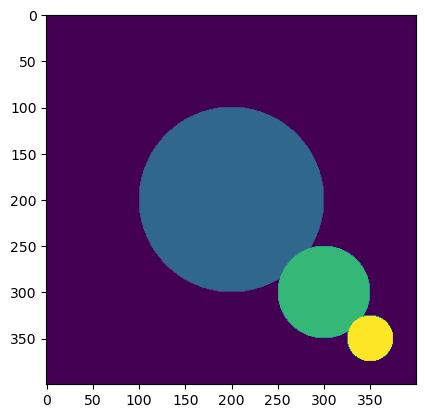

In [32]:
c2_center = r1 + c1_center
circ2 = ellipse(c2_center, c2_center, r2, r2)
circle_img[circ2] = 3
plt.imshow(circle_img)
plt.show()

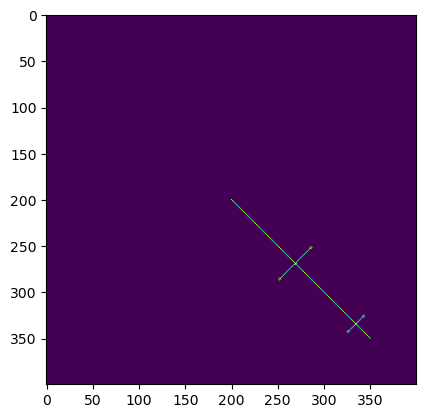

In [33]:
repeated_circle_skel = skeletonize(circle_img.astype(bool))
plt.imshow(repeated_circle_skel.astype(int))
plt.show()

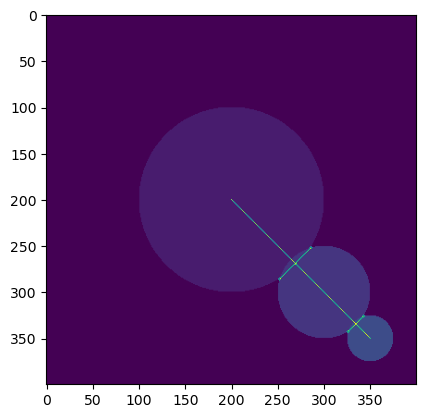

In [34]:
plt.imshow(circle_img + repeated_circle_skel.astype(int)*10)
plt.show()

In [35]:
#imsave('repeated_circle_img.tif', circle_img)
#imsave('binary_repeated_circle_img.tif', circle_img.astype(bool).astype(np.uint8))
#imsave('repeated_circle_skel.tif', repeated_circle_skel.astype(np.uint8))